# Proyecto Integrador 1 - Leila Abduca - Exploratory Data Analysys

## Índice

- Instalamos librerías y cargamos dataset
- Exploración inicial del dataset
- Descripción de los datos
- Evaluación de la calidad de los datos
- Identificación de duplicados
- Análisis de calidad de datos por ciudad
- Gráficos por ciudad
- Selección de Ciudad para el análisis
- Imputación de valores erróneos y faltantes
  - Edad: Corrección de valores erróneos
  - Imputación de edad
- Frecuencia de visita
  - Elimino casos de frecuencia de visita 0
  - Frecuencia de visita: Análisis previo a imputación
- Análisis para imputación de valores faltantes en promedio de gasto en comida
  - Imputación de promedio de gasto en comida
- Análisis previo a imputación de preferencias de comidas
  - Prueba de imputación de preferencias alimenticias
  - Imputación de preferencias alimenticias
- Modificación de tipo de datos
- Análisis exploratorio con tablas y gráficos iniciales


# Conociendo al Cliente 360°: Datos, Opiniones y Tendencias
Formas parte de un proceso de selección técnica para el rol de Científico de Datos Junior en InsightReach.

InsightReach es una empresa de marketing digital especializada en campañas personalizadas para negocios locales. Con el crecimiento de su base de clientes y la expansión a nuevos mercados, la empresa busca optimizar su estrategia de segmentación para mejorar la efectividad de sus campañas.

Como postulante, tu desafío es demostrar tu capacidad para analizar, enriquecer e interpretar bases de datos complejas para generar recomendaciones accionables. Tu rol simula el trabajo de un profesional en un entorno real, donde deberás construir análisis sólidos, justificar decisiones y comunicar resultados de manera clara y estructurada.

------

Comienzas el análisis con una base de datos provista por la empresa. Debes adoptar una mirada inquisitiva para detectar la calidad y estructura de los datos, y preparar el terreno para futuras integraciones. Tu papel es el de un científico de datos que inicia el pipeline analítico.

------

## Instalamos librerías y cargamos dataset


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('base_datos_restaurantes_USA_v2.csv')

### Exploración inicial del dataset

In [35]:
df.head()


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2550327378,Jackson,Gomez,31.0,Masculino,Miami,Alto,6,67.51,Sí,No,Vegetariano,Sí,(830)220-1926,NaN,Efectivo,6425
1,9446112038,Samantha,Soto,40.0,Femenino,Denver,Medio,2,44.92,Sí,Sí,Mariscos,No,881-476-1426,NaN,Efectivo,2374
2,3098363243,Terry,Adams,62.0,Femenino,Denver,Bajo,2,9.24,Sí,Sí,Vegetariano,No,NaN,diana74@example.net,Efectivo,1110
3,4013002847,James,Shannon,41.0,Masculino,Boston,Alto,5,30.74,Sí,Sí,Carnes,Sí,NaN,scottfrey@example.com,Tarjeta,6931
4,7372911048,Susan,Jones,49.0,Femenino,San Diego,Bajo,0,0.00,No,No,Carnes,No,243.248.8919,glassgary@example.org,Tarjeta,1350


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

El dataset tiene 30.000 registros y 17 columnas. No hay variables de fecha, por lo que no es necesario parsear al levantar los datos. 

Variables: Las variables del dataset refieren a aspectos sociodemográficos (sexo, edad, ciudad de residencia), socioeconómicos (estrato, ingresos) y de las prácticas culturales relativas al consumo gastronómico, además de datos de contacto (los cuales no serán usados en principio).

Efectivamente. No hay duplicados y son todos los valores distintos y no nulos. Podemos asumir que es la clave primaria, es decir que identifica unívocamente cada caso. Por esto, además concluimos que el dataset no tiene duplicados ni filas vacías en todas las columnas. 

### Descripción de los datos:

**Variables de identificación (No las usaremos para análsisi descriptivo):** 
- id_persona: Identificador único de la persona.
- nombre: Nombre 
- apellido: Apellido 
- telefono_contacto: Número de teléfono (campo innecesario para el análisis, sirve para practicar limpieza).
- correo_electronico: Correo electrónico de la persona.


**Variables demográficas:** 

- edad: Edad en años.
- genero: Género 
- ciudad_residencia: Ciudad de residencia (de 10 ciudades de EE. UU.)

**Variables de estratificación social:** 

- estrato_socioeconomico: Nivel socioeconómico (Bajo, Medio, Alto, Muy Alto).
- ingresos_mensuales: Ingresos mensuales (USD).

**Variables relativas al restarant (y relacionadas con prácticas socioculturales):**

- frecuencia_visita: Número aproximado de visitas al mes a restaurantes.
- promedio_gasto_comida: Gasto promedio por visita a restaurantes (USD).
- ocio: Indica si la persona visita al restaurant por ocio.
- consume_licor: Indica si la persona suele consumir licor al visitar un restaurante.
- preferencias_alimenticias: Preferencia de dieta (Vegano, Vegetariano, Pesacado, Mariscos, Carnes, etc.).
- membresia_premium: Indica si la persona tiene membresía premium (Sí / No) en algún restaurante.
- tipo_de_pago_mas_usado: Método de pago más frecuente (Efectivo, Tarjeta, App, Cripto).


### Evaluación de la calidad de los datos

### Identificación de duplicados. 

Clave primaria: La variable id_persona parecería ser la clave primaria de la clave En ese caso debería tener todos los valores con dato (ya vimos que no hay nulos), distintos y sin duplicados. Observemos si es así:

In [37]:
print(df.duplicated(['id_persona']).sum())
print(df['id_persona'].nunique())

0
30000


In [38]:
df.describe()

,id_persona,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,3.000000e+04,29899.000000,30000.000000,29855.000000,30000.000000
mean,5.504765e+09,49.665006,3.896133,32.603452,5389.755867
std,2.602799e+09,23.839550,2.741532,26.402601,4538.491728
min,1.000153e+09,-5.000000,-3.000000,0.000000,800.000000
25%,3.243617e+09,33.000000,2.000000,13.290000,1860.000000
50%,5.515865e+09,49.000000,4.000000,25.510000,3402.000000
75%,7.754426e+09,65.000000,5.000000,44.400000,7761.000000
max,9.999627e+09,300.000000,10.000000,149.970000,17999.000000



Tipo de datos: edad es un float, pero deberíamos pasarlo a entero y  lo inverso sucede con ingresos mensuales. 

Nulos: Se observan varias columnas con valores nulos, que luego vamos a tratar, como edad, promedio de gasto en comida y preferencias alimenticias. Además, hay valores perdidos en los datos de contacto (correo electrónico y teléfono), los cuales no imputaremos por no ser de relevancia para la etapa actual del análisis, aunque sería importante informarlo para su corrección en la instancia de ingreso de datos. 

Datos erróneos y faltantes (nulos): se identifican algunos errores:

El mínimo y máximo de edad tienen valores inválidos (-5 y 300 respectivamente). 
El mínimo de la frecuencia de visita es de -3, lo cual también es erróneo. También hay casos con 0. 

### Análisis de calidad de datos por ciudad: 
1. Clasifico las variables en numéricas y categóricas para un análisis diferencial.
2. Hago una copia del data set, para pasar los erróneos a nulos y luego evaluar el % de valores perdidos en cada variable (incluyendo erróneos por ciudad)
3. Calculo un promedio final de nulos, promediando el % de nulos en cada variable 
4. Identifico la ciudad con valor más bajo en promedio final de nulos/erróneos

In [1]:
# clasifico las variables para un análisis diferencial  e incluyo solo las que no entrarán en el análisis descriptivo inical:

variables_categoricas = [col for col in df.select_dtypes(exclude='number').columns
                       if col not in ['ciudad_residencia','nombre','apellido','correo_electronico','telefono_contacto']]
                                      
variables_numericas = [col for col in df.select_dtypes(include='number').columns
                       if col not in 'id_persona']

print ('Variables categóricas: ', variables_categoricas)
print('Variables numéricas: ', variables_numericas)


NameError: name 'df' is not defined

In [ ]:
# Hacemos copia del dataset y pasamos los valores erróneos a missing 

df2 = df.copy()

df2['edad'] = np.where (
    (df2['edad'] >= 0) & (df2['edad'] <= 120),
     df2['edad'],
     np.nan
)

df2['frecuencia_visita'] = np.where (
    df2['frecuencia_visita'] > 0,
     df2['frecuencia_visita'],
     np.nan
)

nulos_por_ciudad = (
    df2.groupby('ciudad_residencia')
    .apply(lambda x: x.isna().mean().round(4) * 100)
)

nulos_por_ciudad['promedio_nulos'] = nulos_por_ciudad[
    ['edad', 'frecuencia_visita', 'promedio_gasto_comida', 'preferencias_alimenticias']
].mean(axis=1)

ciudad_min = nulos_por_ciudad['promedio_nulos'].idxmin()

print('La ciudad con menor promedio de nulos es:', ciudad_min)


La ciudad con menor promedio de nulos es: Miami


C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\1564531275.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean().round(4) * 100)


### Gráficos por ciudad

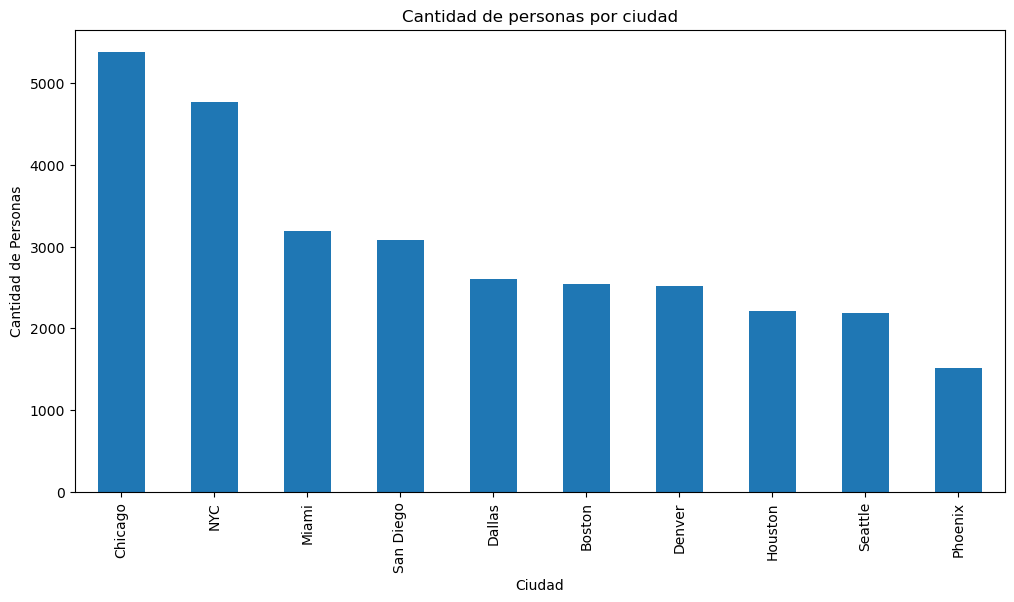

In [41]:
df['ciudad_residencia'].value_counts().plot(kind='bar', figsize=(12,6))
plt.title('Cantidad de personas por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Personas');

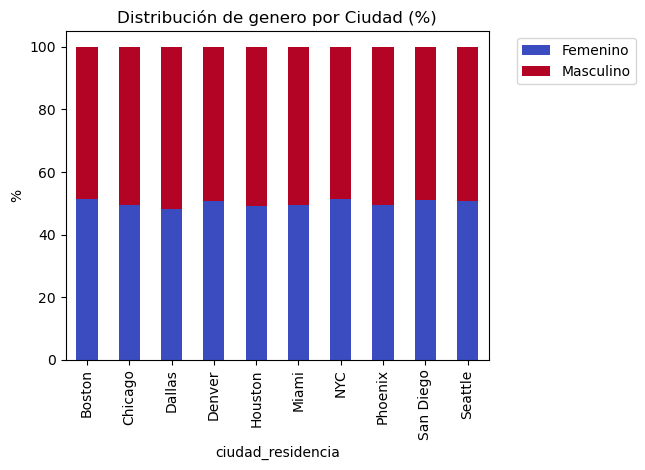

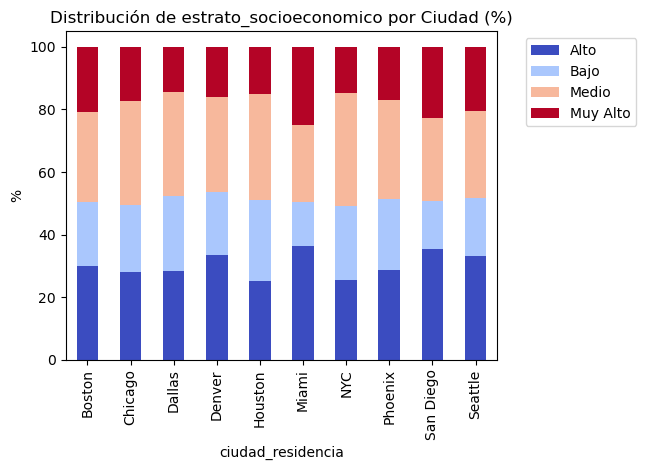

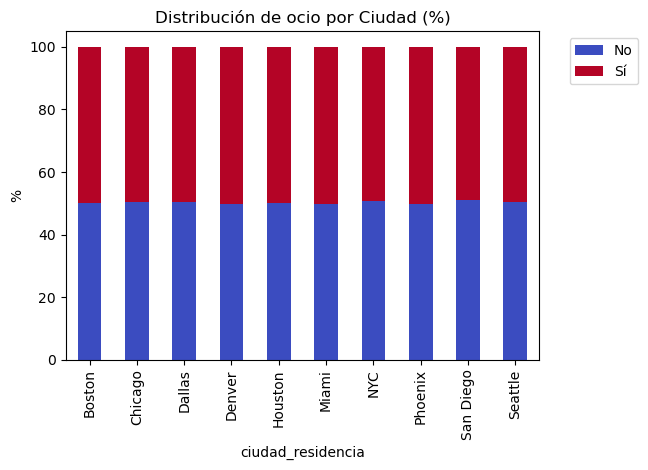

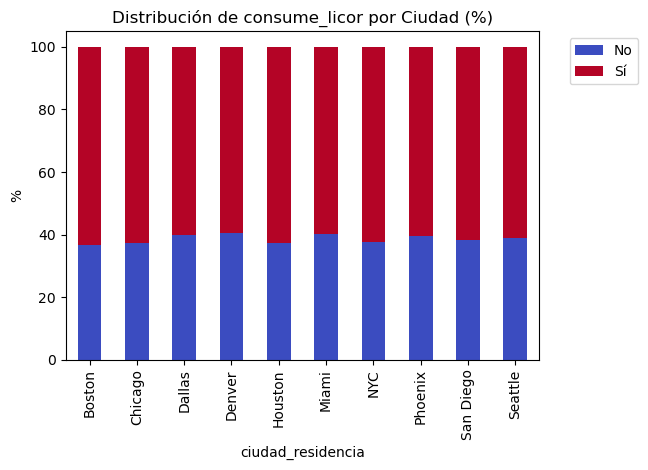

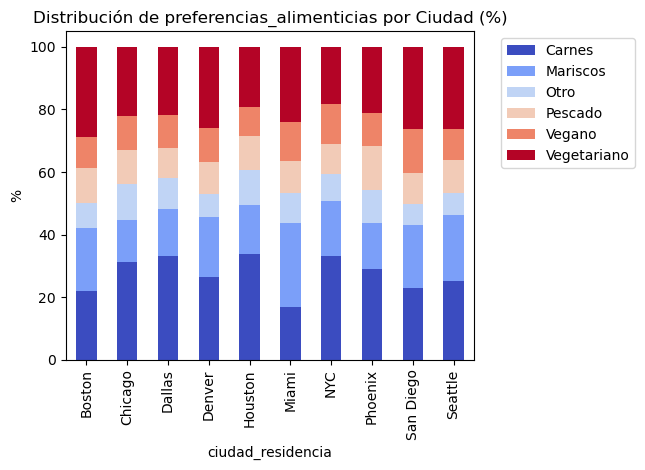

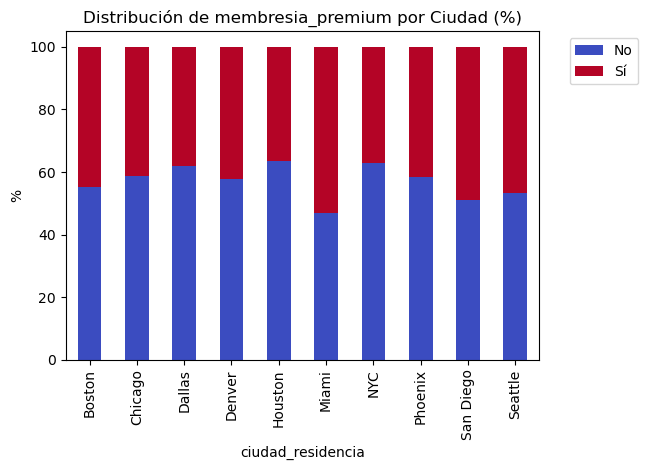

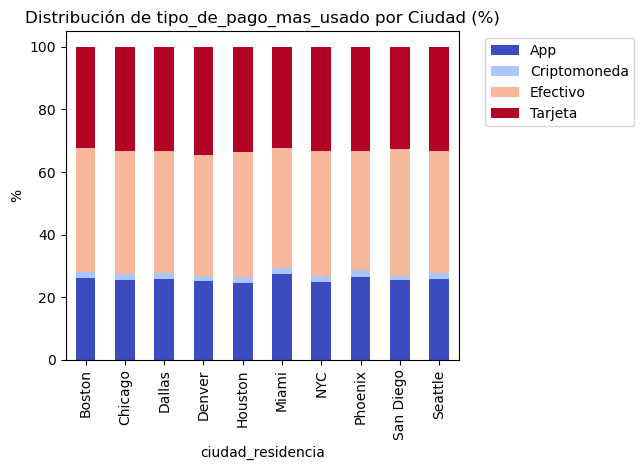

In [42]:
for col in variables_categoricas:
    (pd.crosstab(df['ciudad_residencia'], df[col], normalize='index') * 100).plot(kind='bar', stacked=True, colormap='coolwarm')
    plt.title(f'Distribución de {col} por Ciudad (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # mueve afuera leyenda
    plt.tight_layout() #para que la leyenda no me tape el grafico
    plt.ylabel('%')
    plt.show()


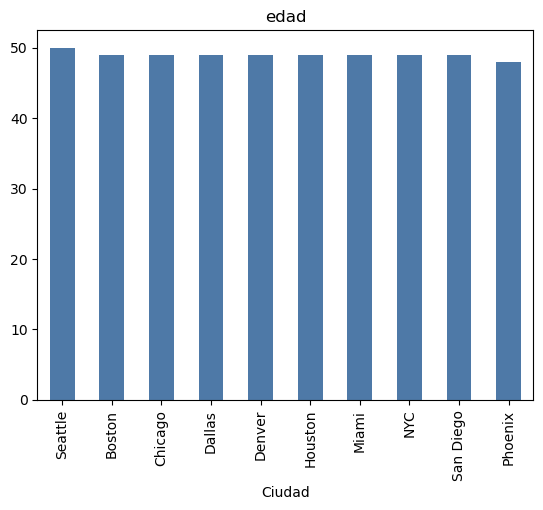

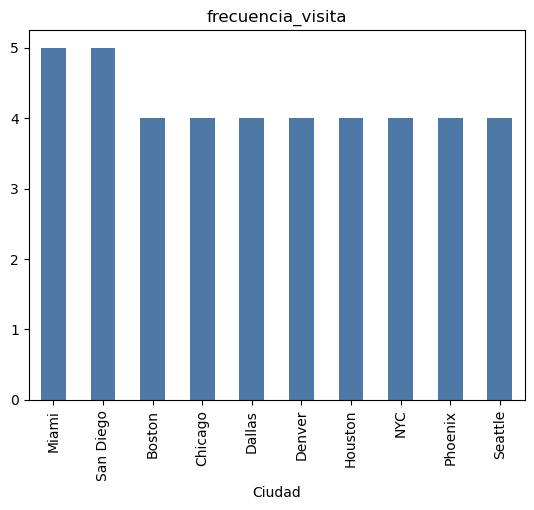

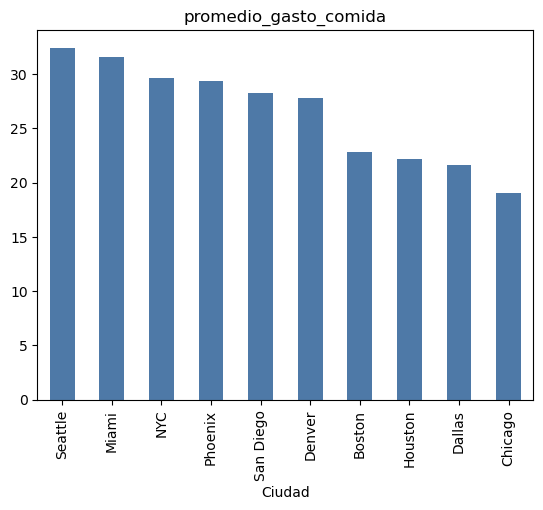

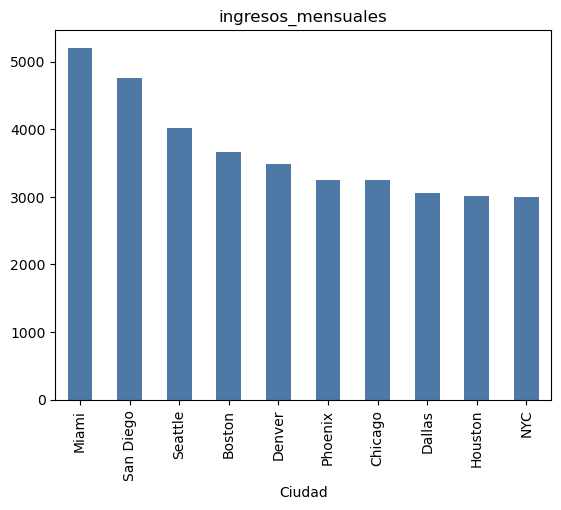

In [43]:

# Mediana de variables categoricas (agrupada por ciudad)

for col in variables_numericas:
    df.groupby('ciudad_residencia')[col].median().sort_values(ascending=False).plot(kind='bar', color='#4E79A7')
    plt.title(col)
    plt.xlabel('Ciudad')
    plt.show()    


In [ ]:

# Conteo 
pref_alim= df['preferencias_alimenticias'].value_counts().reset_index()
pref_alim.columns = ['preferencias_alimenticias', 'cantidad']

# %
pref_alim['porcentaje'] = (pref_alim['cantidad'] / pref_alim['cantidad'].sum() * 100).round(2)

print('Preferencias alimenticias en todas las ciudades:')
print(pref_alim)





Preferencias alimenticias en todas las ciudades:
  preferencias_alimenticias  cantidad  porcentaje
0                    Carnes      7916       27.68
1               Vegetariano      6580       23.01
2                  Mariscos      5212       18.23
3                    Vegano      3267       11.42
4                   Pescado      2983       10.43
5                      Otro      2639        9.23


Si bien no hay mucha diferencia, en función de lo analizado en cuanto a valores faltantes, decidimos elegir a la ciudad de Miami, por un lado, por ser la que tiene menor porporción de valores nulos y erróneos. 

Por otro lado, por tener **más proporción de estratos e ingresos altos y** por ello, más **frecuencia de visita y gasto en restaurants**, y mayor porcentaje de **membresía premium**. Además es la tercera ciudad en cantidad de casos muestrales. 

Se destaca que, comparando con el total, en Miami es donde la prefrencia de carnes es menor, siendo mayor la proporción que prefiere mariscos, seguramente debido a su gran abundancia y diversidad de mariscos frescos, facilitado por su ubicación geográfica. 

### Selección de Ciudad para el análisis: 

In [45]:
#Filtrado: (Con .copy() sino me queda como una vista)

df = df[df['ciudad_residencia'] == 'Miami'].copy()

print(df.shape)
df.info()

(3186, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 3186 entries, 0 to 29988
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 3186 non-null   int64  
 1   nombre                     3186 non-null   object 
 2   apellido                   3186 non-null   object 
 3   edad                       3178 non-null   float64
 4   genero                     3186 non-null   object 
 5   ciudad_residencia          3186 non-null   object 
 6   estrato_socioeconomico     3186 non-null   object 
 7   frecuencia_visita          3186 non-null   int64  
 8   promedio_gasto_comida      3170 non-null   float64
 9   ocio                       3186 non-null   object 
 10  consume_licor              3186 non-null   object 
 11  preferencias_alimenticias  3040 non-null   object 
 12  membresia_premium          3186 non-null   object 
 13  telefono_contacto          1590 non-null 

### Imputación de valores erróneos y faltantes

Además de los valores erróneos en frecuencia_visita y edad tenemos 101 nulos en esta última columna, 145 en promedio de gasto en comida y 1403 en preferencias alimenticias. Los datos faltantes en información de contacto no los imputaremos. 



##### Edad: Corrección de valores erróneos

Ya hemos visto que en edad había valores menores de 0 (-5) y de 300.
Iniciamlmete pasamos esos casos a nulos, para que no genere problemas en el análisis previo a la imputación. Luego veremos cómo imputarlos. 

In [46]:
df['edad'] = np.where (
    (df['edad'] >= 0) & (df['edad'] <= 122),
     df['edad'],
     np.nan
)

df['edad'].describe()


count    3150.000000
mean       49.082540
std        17.892489
min        18.000000
25%        34.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: edad, dtype: float64

count    3150.000000
mean       49.082540
std        17.892489
min        18.000000
25%        34.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: edad, dtype: float64
49.0


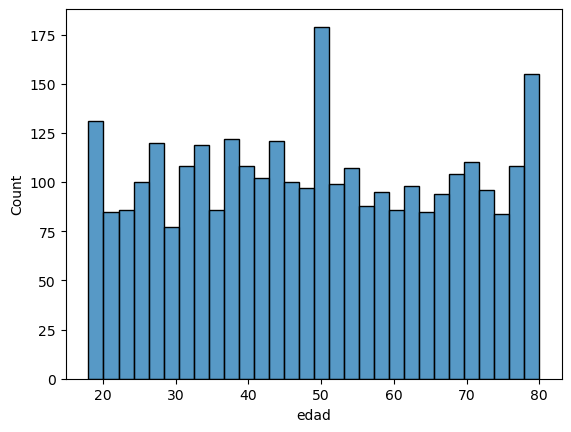

In [47]:
#sns.boxplot(df['edad'])
sns.histplot(data=df, x='edad', bins=30)

print(df['edad'].describe())
print(df['edad'].median())

Excluyendo los inválidos las edades van de 18 a 80 años. Dado que la mediana y la media no difieren, se podría imputar por el promedio o la mediana, pero sería interesante saber si estas medidas varían en función de otras variables. 
Llama la atención que hay algunos valores que se repiten mucho más. Quizás los de 80 y más quedaron en 80, y en forma análoga los de 18 y menos. La En el caso de los de 50, puede ser que el dataset ya haya tenido una imputación previa, y una asignación mayor a los valores de 50 años. 

Vamos a volver a verlo en un gráfico de línea y un conteo por cada edad. Parece estar ok. Luego lo retomaremos en todo caso...

<Axes: xlabel='edad', ylabel='cantidad'>

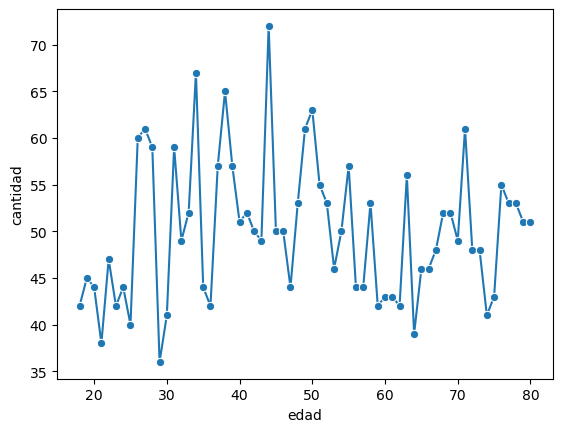

In [48]:
#Frecuencia edad: conteo de valores por edad en nuevo df: 

frecuencias_edad = df['edad'].value_counts().reset_index()  # sort_index() ordena por edad
frecuencias_edad.columns = ['edad', 'cantidad']  # renombrar columnas

sns.lineplot(data=frecuencias_edad, x='edad', y='cantidad', marker='o')

In [49]:
for col in variables_categoricas:
    print(
        df.groupby(col)['edad']
          .agg(promedio='mean', mediana='median')  
          )


            promedio  mediana
genero                       
Femenino   49.507722     50.0
Masculino  48.668546     48.0
                         promedio  mediana
estrato_socioeconomico                    
Alto                    49.695993     49.0
Bajo                    48.480638     48.0
Medio                   49.459355     49.0
Muy Alto                48.153553     48.0
       promedio  mediana
ocio                    
No    48.885824     48.0
Sí    49.275299     49.0
                promedio  mediana
consume_licor                    
No             53.536934     51.0
Sí             46.116869     45.0
                            promedio  mediana
preferencias_alimenticias                    
Carnes                     49.162055     49.5
Mariscos                   49.413580     49.0
Otro                       48.496528     47.0
Pescado                    48.288525     46.0
Vegano                     50.297082     50.0
Vegetariano                48.887656     49.0
                  

In [50]:
#creo con qcut nueva var con dato de cuartiles de cada var numerica 

# Bucle: dividie cada variable en cuartiles y calcular promedio y mediana de edad
for col in variables_numericas:
    df[f'{col}_cuartil'] = pd.qcut(df[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #creo nueva var con dato de cuartiles de cada var numerica
    print(
        df.groupby(f'{col}_cuartil')['edad'] #creo variable pos
          .agg(promedio='mean', mediana='median')
          .round(1)
    )




              promedio  mediana
edad_cuartil                   
Q1                26.5     27.0
Q2                42.1     42.0
Q3                57.1     57.0
Q4                73.0     73.0
                           promedio  mediana
frecuencia_visita_cuartil                   
Q1                             49.4     49.0
Q2                             48.5     48.0
Q3                             51.3     52.0
Q4                             47.8     47.0
                               promedio  mediana
promedio_gasto_comida_cuartil                   
Q1                                 50.2     50.0
Q2                                 48.2     47.0
Q3                                 49.3     49.0
Q4                                 48.8     49.0
                            promedio  mediana
ingresos_mensuales_cuartil                   
Q1                              48.9     49.0
Q2                              49.5     49.0
Q3                              49.8     49.0
Q4            

C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\3617793784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{col}_cuartil')['edad'] #creo variable pos
C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\3617793784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{col}_cuartil')['edad'] #creo variable pos
C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\3617793784.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt th

No se ve una relación entre la edad y las variables analizadas, excepto en consume licor, donde los que no consume tienen un promedio de 54 años y mediana de 52, y entre los que sí lo hacen ambas medidas son 46. Vamos a visualizarlo en un gráfico.



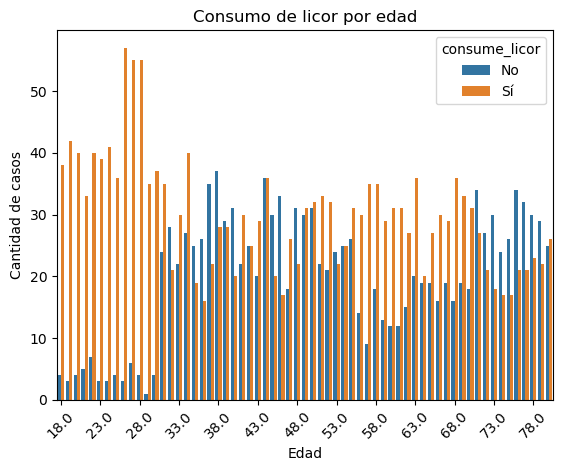

In [51]:
# Conteo por edad y consumo
consumo_por_edad = df.groupby(['edad', 'consume_licor']).size().reset_index(name='cantidad')

sns.barplot(consumo_por_edad, x='edad', y='cantidad', hue='consume_licor')
plt.xticks(range(0, len(consumo_por_edad['edad'].unique()), 5), 
           consumo_por_edad['edad'].unique()[::5], rotation=45)
plt.title('Consumo de licor por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de casos')
plt.show()

Claramente hay una relación entre edad y consume licor, pero no es lineal (a más edad, menos consumo). Luego lo analizaremos mejor, pero parece que los menores de 30 y el grupo entre 55 y 70 tienen un consumo mayor, en tanto en los mayores de esa edad sucede lo inverso y en el grupo de edades medias(30 y 54 aproximandamente) tienen una proporción similar los que consumen licor y los que no. 

Concluimos entonces que no sería necesario tener una imputación de edad diferenciada por consumo de licor.  Si bien la media y mediana son silimares, decidimos imputar por la mediana.

## Imputación  de edad: 

In [63]:
df['edad'] = df['edad'].fillna(df['edad'].median())

### Frecuencia de visita

Análisis para corrección de valores erróneos: 

Hay un valor erróneo (-3) y un valor raro que es 0. Si tuvieramos más información sobre la fuente de datos podríamos decididir con más fundamento que hacer con los casos con 0 visitas. Si los datos surgen de una encuesta en un restaurant, 0 no podría ser válido, pero si son por ejemplo de una encuesta en otro lado, o si incluye delivery, puede ser válido que no tenga visitas. 

Analicemos ambos grupos.

In [52]:
frecuencia_visitas_cero  = df[df['frecuencia_visita'] ==0]
frecuencia_visitas_negativo = df[df['frecuencia_visita'] <0]


print(frecuencia_visitas_negativo.describe())
print(frecuencia_visitas_cero.describe())


         id_persona        edad  frecuencia_visita  promedio_gasto_comida  \
count  1.730000e+02  171.000000              173.0             173.000000   
mean   5.416129e+09   47.812865               -3.0              42.248728   
std    2.705186e+09   18.205689                0.0              30.038603   
min    1.030320e+09   18.000000               -3.0              10.360000   
25%    3.056871e+09   34.000000               -3.0              20.640000   
50%    5.632471e+09   45.000000               -3.0              31.720000   
75%    7.605744e+09   64.000000               -3.0              55.000000   
max    9.930866e+09   80.000000               -3.0             129.140000   

       ingresos_mensuales  
count          173.000000  
mean          6474.202312  
std           4796.968900  
min            821.000000  
25%           2721.000000  
50%           5177.000000  
75%           9265.000000  
max          17774.000000  
         id_persona       edad  frecuencia_visita  pro

No hay dato en gasto en restaurant, y el promedio de ingresos es muy bajo (mucho menor que los de frecuencia -3  y que el promedio general).
En esta taba de frecuencia vemos que todos pertenencen al estrato socioeconómico bajo: 

In [53]:
pd.crosstab(frecuencia_visitas_cero['estrato_socioeconomico'], columns= 'count')

col_0,count
estrato_socioeconomico,
Bajo,102


 Luego de este análisis nos informaron que por las características de la recolección de datos, el dato 0 era un error, por eso, decidimos eliminarlos. 

In [54]:
df['frecuencia_visita']. value_counts()

frecuencia_visita
 5     714
 4     531
 6     464
 3     319
 2     272
-3     173
 10    130
 8     128
 9     125
 7     125
 1     103
 0     102
Name: count, dtype: int64

### Elimino casos de frecuencia de visita 0.

In [ ]:
print(df.shape)
df = df[df['frecuencia_visita'] != 0]
print(df.shape)


(3186, 21)
(3084, 21)


### Frecuencia de visita: Análisis  previo a imputación:

Primero vamos a pasar los valores erróneos (-3) a nulos para que se ignoren en el cálculo de los promedios y mediana.
Luego, realizaremos el mismo análisis realizado para la imputación de edad.

In [56]:
#paso a nulo para el análisis, para luego imputar:

df['frecuencia_visita'] = np.where (
    df['frecuencia_visita'] > 0,
     df['frecuencia_visita'],
     np.nan
)



In [57]:
for col in variables_categoricas:
    print(
        df.groupby(col)['frecuencia_visita']
          .agg(promedio='mean', mediana='median')  
          .round(1)
          )


           promedio  mediana
genero                      
Femenino        4.9      5.0
Masculino       5.0      5.0
                        promedio  mediana
estrato_socioeconomico                   
Alto                         5.0      5.0
Bajo                         2.0      2.0
Medio                        3.5      3.0
Muy Alto                     7.5      8.0
      promedio  mediana
ocio                   
No         4.9      5.0
Sí         5.0      5.0
               promedio  mediana
consume_licor                   
No                  4.9      5.0
Sí                  5.0      5.0
                           promedio  mediana
preferencias_alimenticias                   
Carnes                          4.9      5.0
Mariscos                        4.9      5.0
Otro                            5.1      5.0
Pescado                         4.8      5.0
Vegano                          5.0      5.0
Vegetariano                     5.0      5.0
                   promedio  mediana
membres

En este caso sí podemos observar que la frecuencia de visitas tiene relación directa con el estrato. Por lo analizado, decidimos estimar la frecuencia de visita al restaurant en función solamente de la mediana según estrato socioeconómico, por ser una medida de tendencia central más robusta, que  evita la sensibilidad a los valores extremos que tiene la media. 


### Análisis para imputación de valores faltantes en promedio de gasto en comida.

In [58]:
for col in variables_categoricas:
    print(
        df.groupby(col)['promedio_gasto_comida']
          .agg(promedio='mean', mediana='median')  
          .round(1)
          )


           promedio  mediana
genero                      
Femenino       41.5     32.4
Masculino      40.9     32.9
                        promedio  mediana
estrato_socioeconomico                   
Alto                        40.1     40.2
Bajo                        17.3     16.8
Medio                       24.9     25.0
Muy Alto                    68.8     68.0
      promedio  mediana
ocio                   
No        41.5     32.9
Sí        40.8     32.2
               promedio  mediana
consume_licor                   
No                 41.0     33.0
Sí                 41.2     32.4
                           promedio  mediana
preferencias_alimenticias                   
Carnes                         41.6     31.6
Mariscos                       40.4     32.9
Otro                           42.8     34.2
Pescado                        40.7     33.0
Vegano                         42.1     31.1
Vegetariano                    40.6     31.8
                   promedio  mediana
membres

Acá el gasto en comida claramente tiene relación con el estrato socioeconómico, y con la membresía premium.

In [59]:
print('Relación de promedio y mediana de gasto en comida según cuartiles de variables numéricas')
for col in variables_numericas:
    df[f'{col}_cuartil'] = pd.qcut(df[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #creo nueva var con dato de cuartiles de cada var numerica
    print(
        df.groupby(f'{col}_cuartil')['promedio_gasto_comida'] #creo variable pos
          .agg(promedio='mean', mediana='median')
          .round(1)
    )


Relación de promedio y mediana de gasto en comida según cuartiles de variables numéricas
              promedio  mediana
edad_cuartil                   
Q1                42.3     33.8
Q2                39.4     31.6
Q3                41.7     32.3
Q4                41.2     33.1
                           promedio  mediana
frecuencia_visita_cuartil                   
Q1                             27.2     23.2
Q2                             42.3     35.6
Q3                             47.0     44.3
Q4                             67.3     66.1
                               promedio  mediana
promedio_gasto_comida_cuartil                   
Q1                                 15.2     15.2
Q2                                 26.0     25.7
Q3                                 42.1     40.3
Q4                                 81.4     70.0
                            promedio  mediana
ingresos_mensuales_cuartil                   
Q1                              21.4     20.0
Q2               

C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\504232827.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{col}_cuartil')['promedio_gasto_comida'] #creo variable pos
C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\504232827.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(f'{col}_cuartil')['promedio_gasto_comida'] #creo variable pos
C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\504232827.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavi

Asimismo tiene una clara relación con los ingresos mensuales, y la frecuencia de visita. Consideramos que ambas también se relacionan con el estrato socioeconómico, la cual nos parece la variable explicativa. 

Por esta razón, imputaremos estos casos según estrato. 

### Imputación de frecuencia de visita y promedio de gasto en comida: 

In [64]:
# frecuencia_visita: Imputación condicional según la mediana del estrato socioeconómico al que pertenece
df['frecuencia_visita'] = df['frecuencia_visita'].fillna(
    df.groupby('estrato_socioeconomico', observed=True)['frecuencia_visita'].transform('median')
    ) #acá agrego el observed para que no me arroje Warning, y considere solo las combinaciones de categorías presentes en los datos.

# Promedio del gasto en comida: Imputación condicional según la mediana del estrato socioeconómico al que pertenece
df['promedio_gasto_comida'] = df['promedio_gasto_comida'].fillna(
    df.groupby('estrato_socioeconomico', observed=True)['promedio_gasto_comida'].transform('median')
)

### Análisis previo a imputación de preferencias de comidas. 

Acá la cuestión cambia por tratarse de una variable nominal


In [60]:
for col in variables_numericas:
    df[f'{col}_cuartil'] = pd.qcut(df[col], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']) #creo nueva var con dato de cuartiles de cada var numerica
    tabla = pd.crosstab(df[f'{col}_cuartil'], df['preferencias_alimenticias'], normalize='index')*100 #hago un cruce para cada var. 
    print(tabla.round(0))

preferencias_alimenticias  Carnes  Mariscos  Otro  Pescado  Vegano  \
edad_cuartil                                                         
Q1                           15.0      26.0  10.0     11.0    11.0   
Q2                           17.0      27.0  10.0     12.0    13.0   
Q3                           19.0      27.0   9.0      8.0    13.0   
Q4                           15.0      28.0   9.0     10.0    14.0   

preferencias_alimenticias  Vegetariano  
edad_cuartil                            
Q1                                26.0  
Q2                                22.0  
Q3                                24.0  
Q4                                24.0  
preferencias_alimenticias  Carnes  Mariscos  Otro  Pescado  Vegano  \
frecuencia_visita_cuartil                                            
Q1                           17.0      28.0   9.0     11.0    12.0   
Q2                           16.0      27.0   9.0     10.0    14.0   
Q3                           16.0      25.0  10.0    

In [ ]:
for col in variables_categoricas:
    cross = pd.crosstab(df[col], df['preferencias_alimenticias'], normalize='index') * 100
    cross_percent = cross.round(1).astype(str) + '%'
    print(f'\nDistribución de preferencias_alimenticias por {col}:')
    print(cross_percent)


Distribución de preferencias_alimenticias por genero:
preferencias_alimenticias Carnes Mariscos   Otro Pescado Vegano Vegetariano
genero                                                                     
Femenino                   17.9%    26.1%   8.8%   10.9%  11.5%       24.9%
Masculino                  15.6%    28.0%  10.2%    9.5%  13.6%       23.1%

Distribución de preferencias_alimenticias por estrato_socioeconomico:
preferencias_alimenticias Carnes Mariscos   Otro Pescado Vegano Vegetariano
estrato_socioeconomico                                                     
Alto                       17.8%    25.8%   9.1%   10.0%  12.1%       25.1%
Bajo                       16.0%    30.2%   9.3%   12.0%   8.0%       24.4%
Medio                      16.1%    27.0%   8.7%   10.3%  15.0%       22.8%
Muy Alto                   16.1%    27.5%  11.0%    9.4%  12.8%       23.2%

Distribución de preferencias_alimenticias por ocio:
preferencias_alimenticias Carnes Mariscos  Otro Pescado Vegan

 Mariscos es la moda, seguida de cerca por los vegetarianos. Se mantiene la moda para todos los cuartiles de ingreso, de frecuencia de visita y de promedio de gasto en comida. 
Por edad, la moda es el  vegetariano en el primer cuartil de edad. Lo mismo suecede con las variables categóricas, excepto con los pagos en criptomoneda, donde la moda es vegetariano, lo cual seguramente también tiene relación con la edad. 
Es difícil y un poco forzado, tomar una decisión, ya que aunque es la moda casi siempre está seguida muy de cerca por vegetariano. En el primer caso, está apenas por arriba del 25 % y en el segundo, apenas por debajo.

In [62]:
# Distribución original (con na)

fre_valores = df['preferencias_alimenticias'].value_counts() 
print('Frecuencia absoluta en preferencias_alimenticias:')
print(fre_valores)

fre_valores_p = df['preferencias_alimenticias'].value_counts(normalize=True) *100 
print('Frecuencia absoluta en preferencias_alimenticias:')
print(fre_valores_p.round(1))



Frecuencia absoluta en preferencias_alimenticias:
preferencias_alimenticias
Mariscos       795
Vegetariano    705
Carnes         492
Vegano         370
Pescado        299
Otro           280
Name: count, dtype: int64
Frecuencia absoluta en preferencias_alimenticias:
preferencias_alimenticias
Mariscos       27.0
Vegetariano    24.0
Carnes         16.7
Vegano         12.6
Pescado        10.2
Otro            9.5
Name: proportion, dtype: float64


### Prueba de imputación de Preferencias alimenticias: 

In [65]:
df_prueba = df.copy()  


#por la complejidad usaremos un condicional en lugar de fillna

df_prueba['preferencias_alimenticias'] = np.where(
    df_prueba['preferencias_alimenticias'].isna(),  # solo NaN
    np.where(
        (df_prueba['tipo_de_pago_mas_usado'] != 'Criptomoneda') &
        (df_prueba['edad_cuartil'] != 'Q1'),
        'Mariscos',      # si se cumple la condición
        'Vegetariano'    # si no se cumple
    ),
    df_prueba['preferencias_alimenticias']  # si no es NaN, dejar el valor original
)

fre_valores_p = df_prueba['preferencias_alimenticias'].value_counts(normalize=True) *100 
print('Frecuencia porcentual en preferencias_alimenticias:')
print(fre_valores_p.round(1))

Frecuencia porcentual en preferencias_alimenticias:
preferencias_alimenticias
Mariscos       28.8
Vegetariano    24.5
Carnes         16.0
Vegano         12.0
Pescado         9.7
Otro            9.1
Name: proportion, dtype: float64


Con esta primera prueba de imputación se incrementaría en 1,8 puntos porcentuales en Mariscos, y 0,5 en vegetariano. No es mucho, pero me sigue pareciendo algo sesgado, ya que estamos aumentando la proporción de las dos opciones principales. 
Creo entonces que podemos hacerlo en forma aleatoria, por ejemplo ordenando la base por edad y llenando el valor faltante con el caso de abajo. 
De esta forma los de edades similares tendrán un comportamiento parecido, pero los nulos se repartirían similarmente entre todas las categorías. 

In [ ]:
# Ordenar por edad ascendente

df_prueba2 = df.sort_values('edad') ## queda copia, no es necesario .copy()

# Rellenar valores faltantes de preferencias_alimenticias hacia adelante
df_prueba2['preferencias_alimenticias'] = df_prueba2['preferencias_alimenticias'].fillna(method='bfill')

C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\3468332017.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_prueba2['preferencias_alimenticias'] = df_prueba2['preferencias_alimenticias'].fillna(method='bfill')


In [ ]:
fre_valores_p2 = df_prueba2['preferencias_alimenticias'].value_counts(normalize=True) *100 
print('Frecuencia absoluta en preferencias_alimenticias: prueba 2')
print(fre_valores_p2.round(1))

print('Aumento de frecuencia absoluta en preferencias_alimenticias post imputacion prueba 2')
print( df_prueba2['preferencias_alimenticias'].value_counts() - df['preferencias_alimenticias'].value_counts())

Frecuencia absoluta en preferencias_alimenticias: prueba 2
preferencias_alimenticias
Mariscos       26.8
Vegetariano    24.0
Carnes         17.0
Vegano         12.5
Pescado        10.1
Otro            9.5
Name: proportion, dtype: float64
Aumento de frecuencia absoluta en preferencias_alimenticias post imputacion prueba 2
preferencias_alimenticias
Mariscos       33
Vegetariano    35
Carnes         33
Vegano         16
Pescado        13
Otro           13
Name: count, dtype: int64


Esta última prueba parece la mejor. En términos absolutos, los valores imputados aumentan en la categorías con más casos disminuendo en las de menos casos. 
Inicialmente no me di cuenta por qué a nivel de porcentajes no se veía la diferencia. Pero analizando, entendí que era porque la variacíon porcentual del total fue algo menor a la de las categorías de más casos, por eso su proporción no varió casi. 

De todas formas, dado que la imputación respetó la distribución, y asignó valores a todas las categorías pareció el mejor resultado, así que realizaré la imputación en la base original (filtrada)

### Imputación de preferencias alimenticias: 

Luego de las pruebas para decidir método de imputación, lo ejecutamos en el data frame con el que estábamos trabajando

In [71]:
# Ordenar por edad ascendente

df = df.sort_values('edad')

# Rellenar valores faltantes de preferencias_alimenticias hacia adelante
df['preferencias_alimenticias'] = df['preferencias_alimenticias'].fillna(method='bfill')

C:\Users\27267964837\AppData\Local\Temp\ipykernel_26408\672029192.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['preferencias_alimenticias'] = df['preferencias_alimenticias'].fillna(method='bfill')


In [75]:
# Limpiamos dataset de las variables generadas para el análisis de imputación

eliminar_col = ['edad_cuartil','frecuencia_visita_cuartil', 'promedio_gasto_comida_cuartil', 'ingresos_mensuales_cuartil']

df.drop(columns= eliminar_col, inplace=True)



In [76]:
## Chequeos de que no haya más valores nulos
print(df.isna().sum())
df.describe(include='all')

id_persona                      0
nombre                          0
apellido                        0
edad                            0
genero                          0
ciudad_residencia               0
estrato_socioeconomico          0
frecuencia_visita               0
promedio_gasto_comida           0
ocio                            0
consume_licor                   0
preferencias_alimenticias       0
membresia_premium               0
telefono_contacto            1547
correo_electronico           1544
tipo_de_pago_mas_usado          0
ingresos_mensuales              0
dtype: int64


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,3.084000e+03,3084,3084,3084.000000,3084,3084,3084,3084.000000,3084.000000,3084,3084,3084,3084,1537,1540,3084,3084.000000
unique,NaN,521,816,NaN,2,1,4,NaN,NaN,2,2,6,2,1537,1531,4,NaN
top,NaN,Michael,Smith,NaN,Masculino,Miami,Alto,NaN,NaN,Sí,Sí,Mariscos,Sí,+1-349-729-6766x15988,bbrown@example.com,Efectivo,NaN
freq,NaN,67,57,NaN,1567,3084,1159,NaN,NaN,1551,1846,828,1693,1,2,1196,NaN
mean,5.490195e+09,NaN,NaN,49.126459,NaN,NaN,NaN,4.942607,41.133268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6650.547990
std,2.628738e+09,NaN,NaN,17.783017,NaN,NaN,NaN,2.136354,27.794475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4804.896614
min,1.005012e+09,NaN,NaN,18.000000,NaN,NaN,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000
25%,3.182867e+09,NaN,NaN,34.000000,NaN,NaN,NaN,4.000000,20.392500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2654.250000
50%,5.503971e+09,NaN,NaN,49.000000,NaN,NaN,NaN,5.000000,32.715000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5371.500000
75%,7.785669e+09,NaN,NaN,65.000000,NaN,NaN,NaN,6.000000,54.855000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9345.000000


In [77]:
df.isna().mean().round(4) * 100

id_persona                    0.00
nombre                        0.00
apellido                      0.00
edad                          0.00
genero                        0.00
ciudad_residencia             0.00
estrato_socioeconomico        0.00
frecuencia_visita             0.00
promedio_gasto_comida         0.00
ocio                          0.00
consume_licor                 0.00
preferencias_alimenticias     0.00
membresia_premium             0.00
telefono_contacto            50.16
correo_electronico           50.06
tipo_de_pago_mas_usado        0.00
ingresos_mensuales            0.00
dtype: float64

Solo quedan valores nulos en los datos de contacto de los usuarios, pero no lo imputaremos ni eliminaremos. Tampoco serán datos que usemos para el análisis descriptivo. Solo sería importante informar sobre estos faltantes para mejoras futuras. 


### Modificación de tipo de datos: 

In [78]:

# Edad y y frecuencia_visita a entero

df['edad'] = df['edad'].astype('int64') 
df['frecuencia_visita'] = df['frecuencia_visita'].astype('int64') 
df['ingresos_mensuales'] = df['frecuencia_visita'].astype('float64') 


#Estrato a categórica ordinal

#ordenamos categoría de variable ordinal: 
orden = ['Bajo', 'Medio', 'Alto', 'Muy Alto' ]
df['estrato_socioeconomico'] = pd.Categorical(
    df['estrato_socioeconomico'],
    categories=orden,
    ordered=True
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3084 entries, 6390 to 14318
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id_persona                 3084 non-null   int64   
 1   nombre                     3084 non-null   object  
 2   apellido                   3084 non-null   object  
 3   edad                       3084 non-null   int64   
 4   genero                     3084 non-null   object  
 5   ciudad_residencia          3084 non-null   object  
 6   estrato_socioeconomico     3084 non-null   category
 7   frecuencia_visita          3084 non-null   int64   
 8   promedio_gasto_comida      3084 non-null   float64 
 9   ocio                       3084 non-null   object  
 10  consume_licor              3084 non-null   object  
 11  preferencias_alimenticias  3084 non-null   object  
 12  membresia_premium          3084 non-null   object  
 13  telefono_contacto          1537 no

## Análisis exploratorio con tablas y gráficos iniciales


In [ ]:
# Lista de columnas a tabular: 


for col in variables_categoricas:
    etiqueta = col.replace('_', ' ').title()   # Limpieza de nombre de variable
    
    dist = df[col].value_counts().reset_index()
    dist.columns = [etiqueta, 'Cantidad']   # Renombro columnas
    dist['Porcentaje'] = (dist['Cantidad'] / dist['Cantidad'].sum() * 100).round(2)
    
    print(f'\nDistribución por {etiqueta}:')
    print(dist)



Distribución por Genero:
      Genero  Cantidad  Porcentaje
0  Masculino      1567       50.81
1   Femenino      1517       49.19

Distribución por Estrato Socioeconomico:
  Estrato Socioeconomico  Cantidad  Porcentaje
0                   Alto      1159       37.58
1               Muy Alto       799       25.91
2                  Medio       783       25.39
3                   Bajo       343       11.12

Distribución por Ocio:
  Ocio  Cantidad  Porcentaje
0   Sí      1551       50.29
1   No      1533       49.71

Distribución por Consume Licor:
  Consume Licor  Cantidad  Porcentaje
0            Sí      1846       59.86
1            No      1238       40.14

Distribución por Preferencias Alimenticias:
  Preferencias Alimenticias  Cantidad  Porcentaje
0                  Mariscos       828       26.85
1               Vegetariano       740       23.99
2                    Carnes       525       17.02
3                    Vegano       386       12.52
4                   Pescado       312  

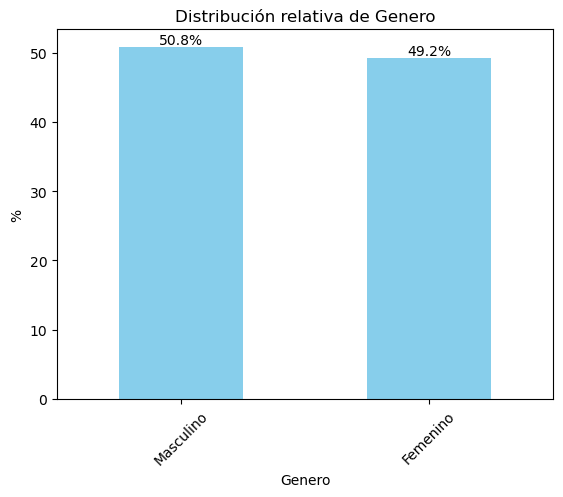

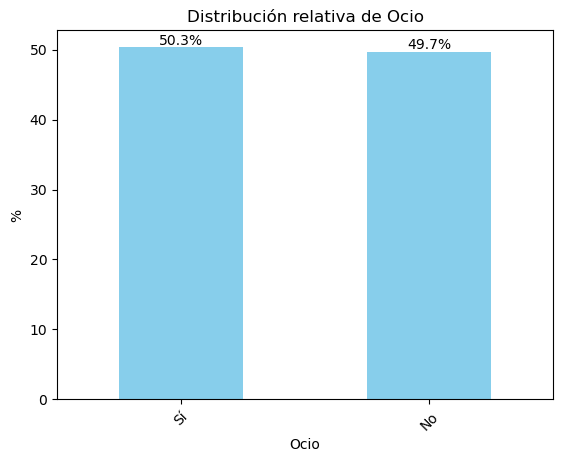

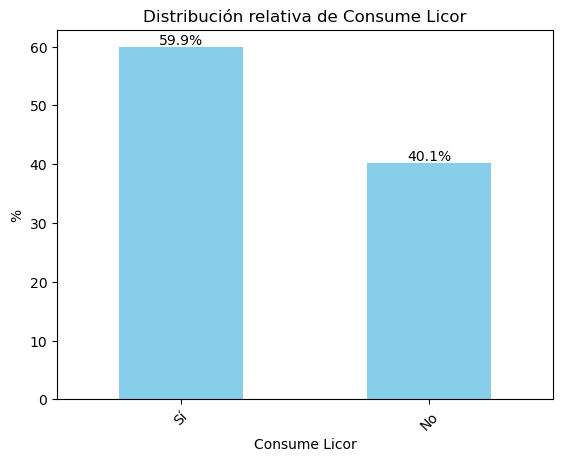

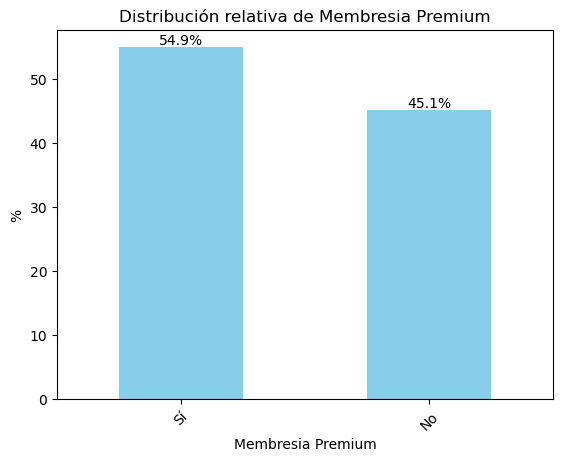

In [83]:
# Gráficos univariados de variables categoricas

# Repetimos análisis para seleccion de variables con información no muy clara al hacer el análisis por ciudad, por tener muchas categorías: 
var_categoricas_muchas_categorias = [col for col in variables_categoricas 
                                   if col in ['genero', 'membresia_premium', 'ocio', 'consume_licor']] ## borro mucho elementos de la lista

for col in var_categoricas_muchas_categorias:
    etiqueta = col.replace('_', ' ').title()  # Saco _ y formato titulo
    data = df[col].value_counts(normalize=True) * 100
    ax = data.plot(kind='bar', color='skyblue')
    plt.title(f'Distribución relativa de {etiqueta}')
    plt.xlabel(etiqueta)
    plt.ylabel('%')
    plt.xticks(rotation=45)
    
    # Agregar etiquetas arriba de cada barra
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom')
    
    plt.show()



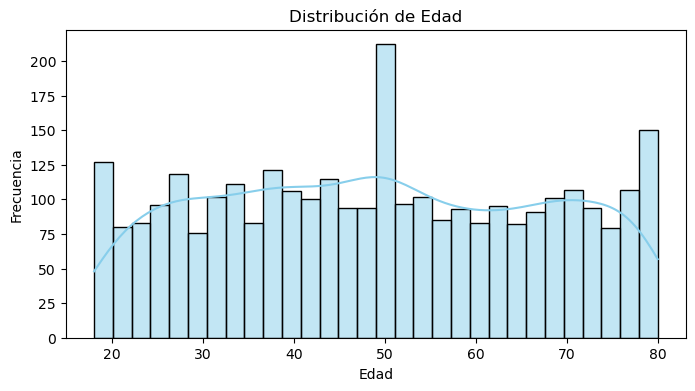

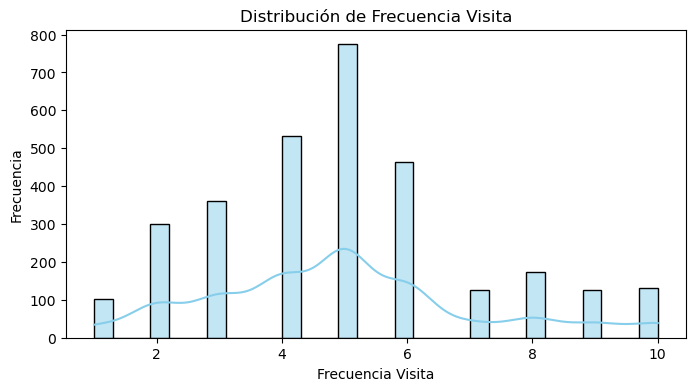

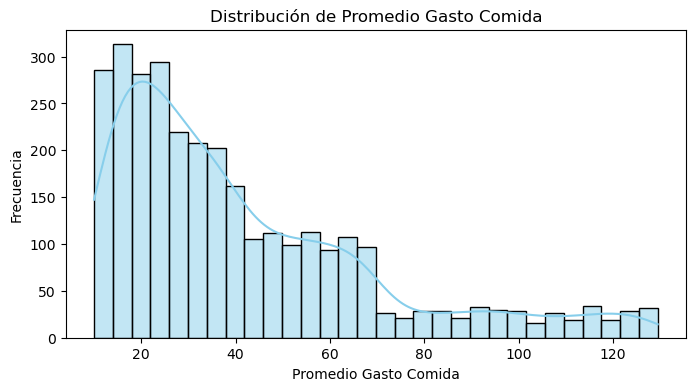

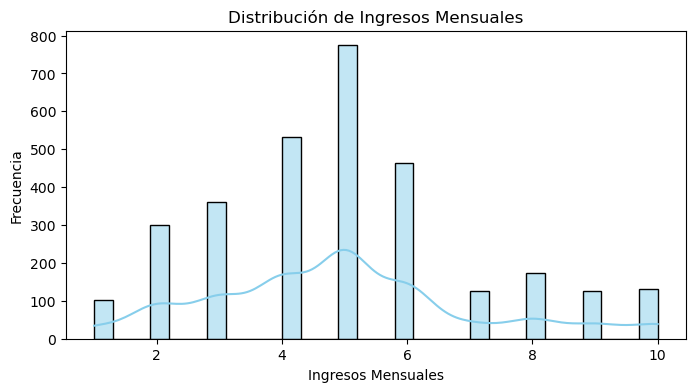

In [ ]:

for col in variables_numericas:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    etiqueta = col.replace('_', ' ').title()  # Saco _ y formato titulo
    plt.xlabel(etiqueta)
    plt.title(f'Distribución de {etiqueta}')
    plt.xlabel(etiqueta)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
df.to_csv('base_usuarios_limpia.csv', index= False)